In [18]:
%matplotlib inline
import geopandas as gpd
import geoplot.crs as gcrs
import geoplot as gplt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import fiona


In [19]:
airbnbs = gpd.read_file('listings.csv')

In [20]:
airbnbs.longitude = pd.to_numeric(airbnbs.longitude)
airbnbs.latitude = pd.to_numeric(airbnbs.latitude)
airbnbs = airbnbs.set_geometry(gpd.points_from_xy(airbnbs.longitude, airbnbs.latitude))

C:\Users\advai\anaconda3\envs\geoplot\lib\site-packages\geopandas\array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


In [21]:
airbnbs.price = airbnbs['price'].str.replace('$', '', regex = False)
airbnbs.price = airbnbs['price'].str.replace(',', '', regex = False)
airbnbs.price = pd.to_numeric(airbnbs.price)

In [33]:
airbnbs.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,geometry
0,2384,https://www.airbnb.com/rooms/2384,20211215062239,2021-12-15,Hyde Park - Walk to University of Chicago,If you have proof of vaccination and can clim...,The apartment is less than one block from beau...,https://a0.muscache.com/pictures/9780bb37-fb54...,2613,https://www.airbnb.com/users/show/2613,...,4.95,4.94,R17000015609,f,1,0,1,0,2.27,POINT (-87.58780 41.78790)
1,7126,https://www.airbnb.com/rooms/7126,20211215062239,2021-12-15,Tiny Studio Apartment 94 Walk Score,A very small studio in a wonderful neighborhoo...,"Ukrainian Village was just named ""Hottest Neig...",https://a0.muscache.com/pictures/51073/16c81c7...,17928,https://www.airbnb.com/users/show/17928,...,4.87,4.73,R18000034991,f,1,1,0,0,2.80,POINT (-87.68021 41.90166)
2,10945,https://www.airbnb.com/rooms/10945,20211215062239,2021-12-15,The Biddle House (#1),Beautiful first floor apartment in Historic Ol...,,https://a0.muscache.com/pictures/58d1a420-a24b...,33004,https://www.airbnb.com/users/show/33004,...,4.97,4.56,2120297,t,8,8,0,0,0.42,POINT (-87.63981 41.91196)
3,12140,https://www.airbnb.com/rooms/12140,20211215062239,2021-12-15,Lincoln Park Guest House,Bed and Breakfast license issued by the City o...,The Guest House is in the heart of Chicago's m...,https://a0.muscache.com/pictures/55126/6a4f01b...,46734,https://www.airbnb.com/users/show/46734,...,5.0,5.0,R20000055258,f,1,0,1,0,0.09,POINT (-87.64947 41.92357)
4,22362,https://www.airbnb.com/rooms/22362,20211215062239,2021-12-15,Luxury in Chicago! 2BR/ 2Ba / Parking / BBQ,Fantastic condo in a Great Location with cover...,"Our home overlooks the park and is on a quiet,...",https://a0.muscache.com/pictures/117030/58b7f9...,85811,https://www.airbnb.com/users/show/85811,...,4.89,4.89,R17000018689,f,2,2,0,0,0.09,POINT (-87.65889 41.89730)


{'whiskers': [<matplotlib.lines.Line2D at 0x1d3d7f0dbe0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d3d824b1c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d3d7f0d910>],
 'medians': [<matplotlib.lines.Line2D at 0x1d3d824b760>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d3d824ba30>],
 'means': []}

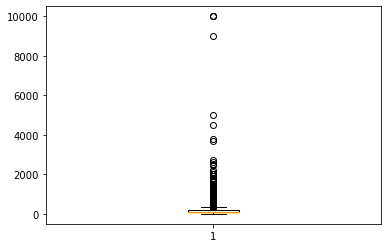

In [22]:
plt.boxplot(airbnbs.price)

In [23]:
# Subset dataframe without outliers
airbnbs_no_outliers = airbnbs[(np.abs(stats.zscore(airbnbs['price'])) < 3)]

{'whiskers': [<matplotlib.lines.Line2D at 0x1d3d60bcee0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d3d74ac4c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d3d60bcc10>],
 'medians': [<matplotlib.lines.Line2D at 0x1d3d74aca60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d3d74acd30>],
 'means': []}

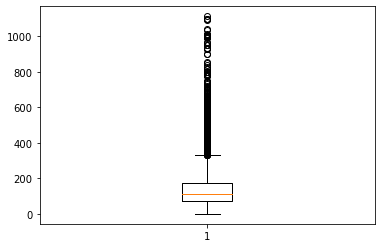

In [24]:
plt.boxplot(airbnbs_no_outliers['price'])

<GeoAxesSubplot:>

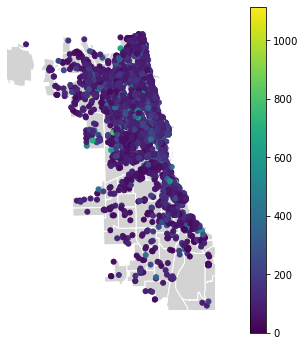

In [25]:
chi = gpd.read_file('chi_bounds.geojson')
ax = gplt.polyplot(chi, projection=gcrs.AlbersEqualArea(), edgecolor='white', facecolor='lightgray')
gplt.pointplot(airbnbs_no_outliers, ax=ax, hue = 'price', legend = True)

In [26]:
chi

,pri_neigh,sec_neigh,shape_area,shape_len,geometry
0,Grand Boulevard,BRONZEVILLE,48492503.1554,28196.837157,"MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ..."
1,Printers Row,PRINTERS ROW,2162137.97139,6864.247156,"MULTIPOLYGON (((-87.62761 41.87437, -87.62760 ..."
2,United Center,UNITED CENTER,32520512.7053,23101.363745,"MULTIPOLYGON (((-87.66707 41.88885, -87.66707 ..."
3,Sheffield & DePaul,SHEFFIELD & DEPAUL,10482592.2987,13227.049745,"MULTIPOLYGON (((-87.65833 41.92166, -87.65835 ..."
4,Humboldt Park,HUMBOLDT PARK,125010425.593,46126.751351,"MULTIPOLYGON (((-87.74060 41.88782, -87.74060 ..."
...,...,...,...,...,...
93,Belmont Cragin,"BELMONT CRAGIN,HERMOSA",109099407.211,43311.706886,"MULTIPOLYGON (((-87.74143 41.91698, -87.74141 ..."
94,Austin,AUSTIN,170037750.826,55473.345911,"MULTIPOLYGON (((-87.75620 41.91547, -87.75588 ..."
95,Gold Coast,GOLD COAST,7165705.53467,13685.479377,"MULTIPOLYGON (((-87.62646 41.91147, -87.62640 ..."
96,Boystown,BOYSTOWN,3365778.97115,9780.268985,"MULTIPOLYGON (((-87.64878 41.93999, -87.64927 ..."


In [38]:
airbnbs_by_nbh = dict()
for index, airbnb in airbnbs.iterrows():
    point = airbnb['geometry']
    price = airbnb['price']
    for idx, nbh in chi.iterrows():
        if point.within(nbh['geometry']):
            if not (nbh['pri_neigh'] in airbnbs_by_nbh):
                airbnbs_by_nbh[nbh['pri_neigh']] = [price]
            else:
                airbnbs_by_nbh[nbh['pri_neigh']].append(price)

Hyde Park [95.0, 115.0, 60.0, 125.0, 71.0, 59.0, 70.0, 69.0, 60.0, 50.0, 46.0, 173.0, 214.0, 40.0, 65.0, 81.0, 175.0, 41.0, 90.0, 214.0, 82.0, 35.0, 40.0, 43.0, 150.0, 150.0, 130.0, 150.0, 150.0, 125.0, 81.0, 164.0, 79.0, 299.0, 75.0, 63.0, 57.0, 61.0, 55.0, 58.0, 40.0, 54.0, 58.0, 103.0, 31.0, 24.0, 100.0, 75.0, 198.0, 125.0, 59.0, 55.0, 59.0, 57.0, 58.0, 68.0, 101.0, 67.0, 63.0, 90.0, 155.0, 654.0, 29.0, 29.0, 96.0, 92.0, 70.0, 52.0, 65.0, 48.0, 175.0, 47.0, 55.0, 45.0, 55.0, 45.0, 101.0, 85.0, 450.0, 149.0, 104.0, 64.0, 178.0, 48.0, 66.0, 90.0, 55.0, 74.0, 331.0, 245.0, 58.0, 63.0, 54.0, 65.0, 99.0, 80.0]
Ukrainian Village [65.0, 65.0, 64.0, 153.0, 135.0, 399.0, 59.0, 83.0, 77.0, 165.0, 250.0, 169.0, 119.0, 45.0, 107.0, 150.0, 76.0, 375.0, 44.0, 45.0, 89.0, 45.0, 75.0, 108.0, 60.0, 85.0, 120.0, 100.0, 151.0, 85.0, 74.0, 94.0, 71.0, 176.0, 289.0, 100.0, 99.0, 650.0, 84.0, 141.0, 250.0, 214.0, 84.0, 44.0, 250.0, 369.0, 55.0, 175.0, 70.0, 121.0, 101.0, 93.0, 140.0, 278.0, 250.0, 169.0,

In [52]:
chi['mean_price'] = 0
chi['median_price'] = 0
for i in range(chi.shape[0]):
    chi.at[i, 'mean_price'] = np.mean(airbnbs_by_nbh.get(chi.at[i, 'pri_neigh'], 0))
    chi.at[i, 'median_price'] = np.median(airbnbs_by_nbh.get(chi.at[i, 'pri_neigh'], 0))

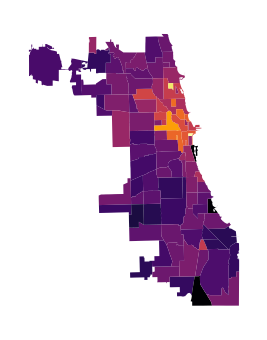

In [66]:
gplt.choropleth(chi, hue = 'mean_price', projection=gcrs.AlbersEqualArea(), cmap = 'inferno')
plt.savefig('mean_airbnbs_chi.png')

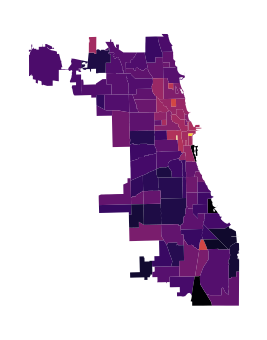

In [67]:
gplt.choropleth(chi, hue = 'median_price', projection=gcrs.AlbersEqualArea(), cmap = 'inferno')
plt.savefig('median_airbnbs_chi.png')